In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [2]:
def print_metrics(y_true,y_pred):
  cm = confusion_matrix(y_true,y_pred)
  print('Confusion matrix\n', cm)
  print('True Positives(TP) = ', cm[1,1])
  print('True Negatives(TN) = ', cm[0,0])
  print('False Positives(FP) = ', cm[0,1])
  print('False Negatives(FN) = ', cm[1,0])
  cm_matrix = pd.DataFrame(data=cm, columns=['Predict: RFI', 'Predict: Pulsar'], 
                                 index=['Actual:RFI', 'Actual:Pulsar'])

  sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
  print(classification_report(y_true, y_pred))
  
  TP = cm[1,1]
  TN = cm[0,0]
  FP = cm[0,1]
  FN = cm[1,0]

  classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
  print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
  ## classification error
  classification_error = (FP + FN) / float(TP + TN + FP + FN)
  print('Classification error : {0:0.4f}'.format(classification_error))
  ## precision score
  precision = TP / float(TP + FP)
  print('Precision : {0:0.4f}'.format(precision))
  ## recall 
  recall = TP / float(TP + FN)
  print('Recall or Sensitivity : {0:0.4f}'.format(recall))
  ## specificity
  specificity = TN / (TN + FP)
  print('Specificity : {0:0.4f}'.format(specificity))
  ## F-1 score
  f1 = 2 * (precision * recall) / (precision + recall)
  print('F-1 score : {0:0.4f}'.format(f1))
  ## ROC_AUC
  ROC_AUC = roc_auc_score(y_true, y_pred)
  print('ROC AUC : {:.4f}'.format(ROC_AUC))

In [3]:
pulsar_dataset = '/home/d.dasarathan/ds5500/projects/datasets/HTRU2/HTRU_2.csv'
dataset=pd.read_csv(pulsar_dataset, header=None)
col_names = ['mean_int_pf', 'std_pf', 'ex_kurt_pf', 'skew_pf', 'mean_dm', 'std_dm', 'kurt_dm', 'skew_dm', 'label']
dataset.columns = col_names
dataset.head()

,mean_int_pf,std_pf,ex_kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,label
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
dataset.dtypes

mean_int_pf    float64
std_pf         float64
ex_kurt_pf     float64
skew_pf        float64
mean_dm        float64
std_dm         float64
kurt_dm        float64
skew_dm        float64
label            int64
dtype: object

In [5]:
dataset.label.value_counts()

0    16259
1     1639
Name: label, dtype: int64

In [6]:
#X = df_main.drop(['label'], axis=1)
X = dataset[['mean_int_pf', 'std_pf', 'ex_kurt_pf', 'skew_pf', 'mean_dm', 'std_dm', 'kurt_dm', 'skew_dm']]
y = dataset['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [8]:
import xgboost as xgb
xg=xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred_xg_train = xg.predict(X_train)
y_pred_xg_test = xg.predict(X_test)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_xg_train)))
print("Model accuracy : ", accuracy_score(y_test, y_pred_xg_test))

[17:12:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training-set accuracy score: 0.9987
Model accuracy :  0.9760893854748603


Confusion matrix
 [[12170     2]
 [   16  1235]]
True Positives(TP) =  1235
True Negatives(TN) =  12170
False Positives(FP) =  2
False Negatives(FN) =  16
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12172
           1       1.00      0.99      0.99      1251

    accuracy                           1.00     13423
   macro avg       1.00      0.99      1.00     13423
weighted avg       1.00      1.00      1.00     13423

Classification accuracy : 0.9987
Classification error : 0.0013
Precision : 0.9984
Recall or Sensitivity : 0.9872
Specificity : 0.9998
F-1 score : 0.9928
ROC AUC : 0.9935


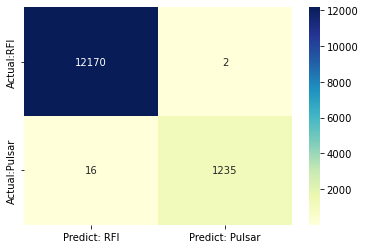

In [9]:
print_metrics(y_train,y_pred_xg_train)

Confusion matrix
 [[4047   40]
 [  67  321]]
True Positives(TP) =  321
True Negatives(TN) =  4047
False Positives(FP) =  40
False Negatives(FN) =  67
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4087
           1       0.89      0.83      0.86       388

    accuracy                           0.98      4475
   macro avg       0.94      0.91      0.92      4475
weighted avg       0.98      0.98      0.98      4475

Classification accuracy : 0.9761
Classification error : 0.0239
Precision : 0.8892
Recall or Sensitivity : 0.8273
Specificity : 0.9902
F-1 score : 0.8571
ROC AUC : 0.9088


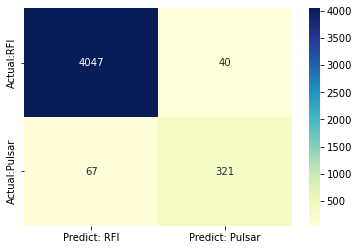

In [10]:
print_metrics(y_test,y_pred_xg_test)

In [11]:
best_model = xgb.XGBClassifier( max_depth=4, n_estimators=100)

best_model.fit(X_train,y_train)

grid_res_train = best_model.predict(X_train)

grid_res_test = best_model.predict(X_test)

[17:12:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Confusion matrix
 [[12156    16]
 [   81  1170]]
True Positives(TP) =  1170
True Negatives(TN) =  12156
False Positives(FP) =  16
False Negatives(FN) =  81
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12172
           1       0.99      0.94      0.96      1251

    accuracy                           0.99     13423
   macro avg       0.99      0.97      0.98     13423
weighted avg       0.99      0.99      0.99     13423

Classification accuracy : 0.9928
Classification error : 0.0072
Precision : 0.9865
Recall or Sensitivity : 0.9353
Specificity : 0.9987
F-1 score : 0.9602
ROC AUC : 0.9670


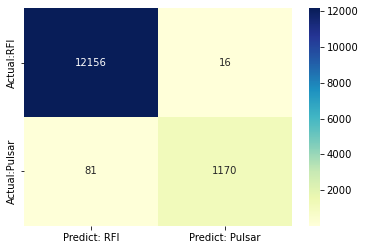

In [12]:
print_metrics(y_train,grid_res_train)

Confusion matrix
 [[4041   46]
 [  73  315]]
True Positives(TP) =  315
True Negatives(TN) =  4041
False Positives(FP) =  46
False Negatives(FN) =  73
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4087
           1       0.87      0.81      0.84       388

    accuracy                           0.97      4475
   macro avg       0.93      0.90      0.91      4475
weighted avg       0.97      0.97      0.97      4475

Classification accuracy : 0.9734
Classification error : 0.0266
Precision : 0.8726
Recall or Sensitivity : 0.8119
Specificity : 0.9887
F-1 score : 0.8411
ROC AUC : 0.9003


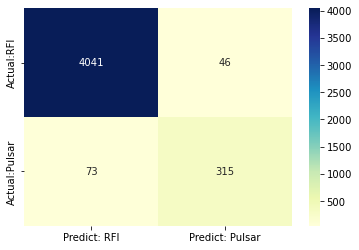

In [13]:
print_metrics(y_test,grid_res_test)

---------------------------------------------------------------------------------------------------------------------------

In [14]:
from sklearn.utils import resample

dataset_majority = dataset[dataset['label']==0]
dataset_minority = dataset[dataset['label']==1]

positive_upsample = resample(dataset_minority, replace = True, 
                        n_samples = dataset_majority.shape[0],
                        random_state = 101)

dataset_upsampled = pd.concat([dataset_majority, positive_upsample])  # concat two data frames i,e majority class data set and upsampled minority class data set
dataset_upsampled = dataset_upsampled.sample(frac = 1)
dataset_upsampled.shape

(32518, 9)

In [15]:
X1 = dataset_upsampled.drop(['label'], axis=1)
y1 = dataset_upsampled['label']

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 10)

In [17]:
import xgboost as xgb
xg= xgb.XGBClassifier(max_depth=4, n_estimators=100)
xg.fit(X1_train, y1_train)
y_pred_xg_train1 = xg.predict(X1_train)
y_pred_xg_test1 = xg.predict(X1_test)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y1_train, y_pred_xg_train1)))
print("Model accuracy : ", accuracy_score(y1_test, y_pred_xg_test1))

[17:12:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training-set accuracy score: 0.9911
Model accuracy :  0.98610086100861


Confusion matrix
 [[12052   137]
 [   81 12118]]
True Positives(TP) =  12118
True Negatives(TN) =  12052
False Positives(FP) =  137
False Negatives(FN) =  81
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12189
           1       0.99      0.99      0.99     12199

    accuracy                           0.99     24388
   macro avg       0.99      0.99      0.99     24388
weighted avg       0.99      0.99      0.99     24388

Classification accuracy : 0.9911
Classification error : 0.0089
Precision : 0.9888
Recall or Sensitivity : 0.9934
Specificity : 0.9888
F-1 score : 0.9911
ROC AUC : 0.9911


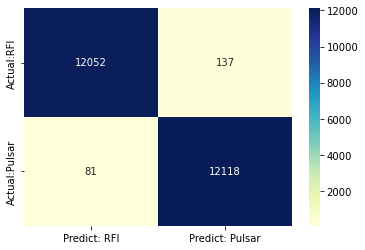

In [18]:
print_metrics(y1_train,y_pred_xg_train1)

Confusion matrix
 [[4002   68]
 [  45 4015]]
True Positives(TP) =  4015
True Negatives(TN) =  4002
False Positives(FP) =  68
False Negatives(FN) =  45
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4070
           1       0.98      0.99      0.99      4060

    accuracy                           0.99      8130
   macro avg       0.99      0.99      0.99      8130
weighted avg       0.99      0.99      0.99      8130

Classification accuracy : 0.9861
Classification error : 0.0139
Precision : 0.9833
Recall or Sensitivity : 0.9889
Specificity : 0.9833
F-1 score : 0.9861
ROC AUC : 0.9861


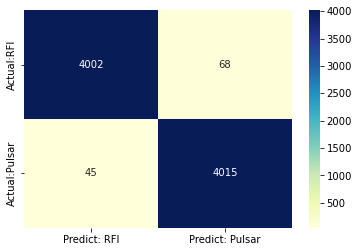

In [19]:
print_metrics(y1_test,y_pred_xg_test1)